In [1]:
from datasetup import flights
fnames = flights()

** Finished! **


Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
1991,1,8,2,1215.0,1215,1340.0,1336,US,121,,85.0,81,,4.0,0.0,EWR,PIT,319.0,,,0,0
1991,1,9,3,1215.0,1215,1353.0,1336,US,121,,98.0,81,,17.0,0.0,EWR,PIT,319.0,,,0,0
1991,1,10,4,1216.0,1215,1332.0,1336,US,121,,76.0,81,,-4.0,1.0,EWR,PIT,319.0,,,0,0

In [2]:
import dask.dataframe as dd

/home/srg/Documents/Collaborations/data-analytics-meetup/talks/Feb2019-Intro-Pandas-Dask/venv/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [3]:
ddf = dd.read_csv(fnames, dtype={'CRSElapsedTime': 'object','TailNum': 'object'})
ddf.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'Diverted'],
      dtype='object')

In [4]:
import pandas as pd

Let's compare the time that Pandas and Dask take to evalute the unique elements of a column

In [5]:
%%time
ddf['UniqueCarrier'].unique().compute().tolist()`

CPU times: user 7.7 s, sys: 856 ms, total: 8.55 s
Wall time: 3.94 s


['US', 'NW', 'TW', 'UA', 'CO', 'DL', 'HP', 'AA', 'PA (1)', 'EA', 'ML (1)']

In [6]:
%%time
carriers = []
for fname in fnames:
    df = pd.read_csv(fname, dtype={'CRSElapsedTime': 'object','TailNum': 'object'})
    carriers.extend(df.UniqueCarrier.unique().tolist())
print(list(set(carriers)))

['HP', 'NW', 'ML (1)', 'EA', 'PA (1)', 'TW', 'UA', 'DL', 'US', 'CO', 'AA']
CPU times: user 5.56 s, sys: 90.8 ms, total: 5.65 s
Wall time: 5.67 s


Let's get and display the average yearly departure delay

In [7]:
ser = ddf.groupby('Year')['DepDelay'].mean()

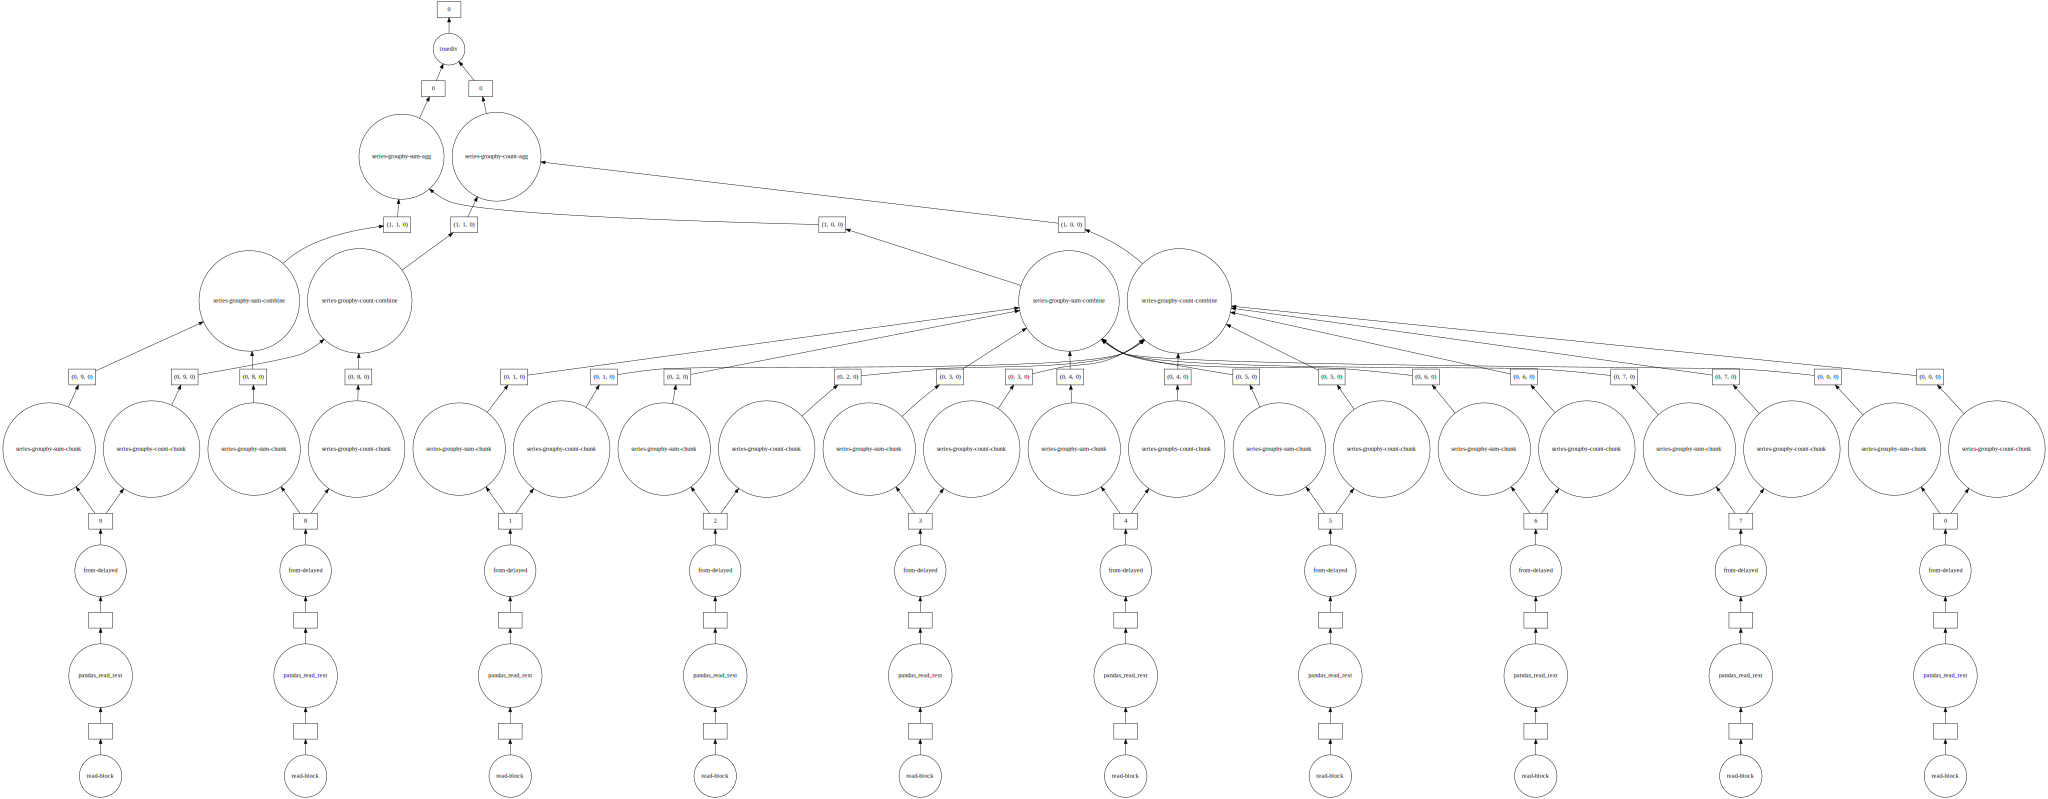

In [8]:
ser.visualize(filename='multi-csvs.svg')

In [9]:
%matplotlib notebook

<IPython.core.display.Javascript object>


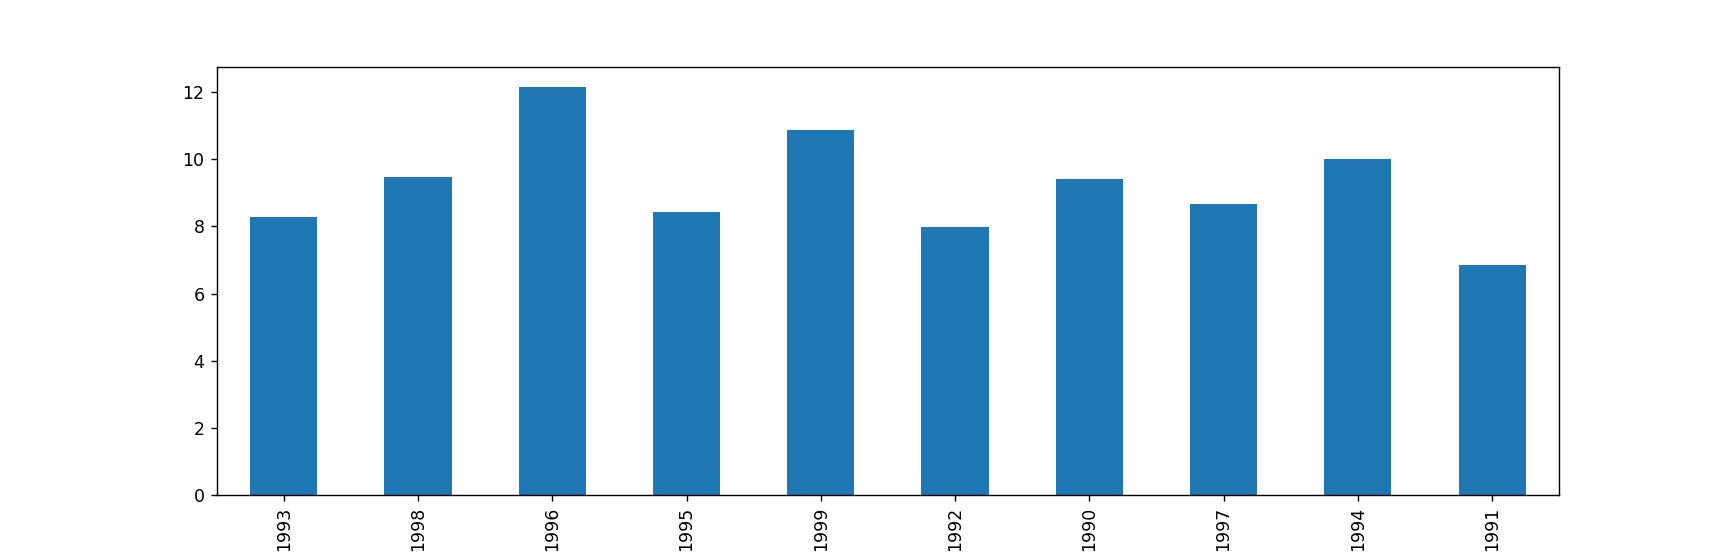

In [10]:
ser.compute().plot.bar()